In [2]:
#importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dropout, Dense, Conv2D, Input, GlobalMaxPool2D, MaxPool2D, BatchNormalization
from tensorflow.keras.datasets import cifar10 

In [3]:
# Load the data
(x_train,y_train), (x_test,y_test) = cifar10.load_data()
x_train = x_train/255.0
x_test = x_test/255.0
#flatten the data
y_train, y_test = y_train.flatten(), y_test.flatten()

print("x_train shape:",x_train.shape)
print("y_train.shape:",y_train.shape)

170500096/170498071 [==============================] - 11s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train.shape: (50000,)


In [4]:
# Number of classes
K = len(set(y_train))
print("Classes:",K)

Classes: 10


In [5]:
# Build the model
model = Sequential([
                    Input(shape=(x_train[0].shape)),
                    Conv2D(32,(3,3),activation='relu',padding='same'),
                    BatchNormalization(),
                    Conv2D(32,(3,3),activation='relu',padding='same'),
                    MaxPool2D((2,2)),
                    Conv2D(64,(3,3),activation='relu',padding='same'),
                    BatchNormalization(),
                    Conv2D(64,(3,3),activation='relu',padding='same'),
                    MaxPool2D((2,2)),
                    Conv2D(128,(3,3),activation='relu',padding='same'),
                    BatchNormalization(),
                    Conv2D(128,(3,3),activation='relu',padding='same'),
                    MaxPool2D((2,2)),
                    Flatten(),
                    Dropout(0.2),
                    Dense(1024,activation='relu'),
                    Dropout(0.2),
                    Dense(K,activation='softmax')
                    ])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        3

In [6]:
# Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Training the model
r = model.fit(x_train,y_train, validation_data=(x_test,y_test),epochs=50)

Epoch 1/50
 104/1563 [>.............................] - ETA: 6:14 - loss: 2.3977 - accuracy: 0.2569

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Fit with data augmentation
# Note: if you run this AFTER calling the previous model.fit(), it will CONTINUE training where it left off
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
1562/1562 [==============================] - 25s 16ms/step - loss: 0.6164 - accuracy: 0.8073 - val_loss: 0.5685 - val_accuracy: 0.8210
Epoch 2/50
1562/1562 [==============================] - 25s 16ms/step - loss: 0.4945 - accuracy: 0.8387 - val_loss: 0.5334 - val_accuracy: 0.8277
Epoch 3/50
1562/1562 [==============================] - 25s 16ms/step - loss: 0.4703 - accuracy: 0.8452 - val_loss: 0.5214 - val_accuracy: 0.8336
Epoch 4/50
1562/1562 [==============================] - 24s 15ms/step - loss: 0.4444 - accuracy: 0.8545 - val_loss: 0.5174 - val_accuracy: 0.8410
Epoch 5/50
1562/1562 [==============================] - 25s 16ms/step - loss: 0.4301 - accuracy: 0.8570 - val_loss: 0.4982 - val_accuracy: 0.8442
Epoch 6/50
1562/1562 [==============================] - 25s 16ms/step - loss: 0.4159 - accuracy: 0.8624 - val_loss: 0.4836 - val_accuracy: 0.8435
Epoch 7/50
1562/1562 [==============================] - 24s 16ms/step - loss: 0.4031 - accuracy: 0.8655 - val_loss: 0.4844 -

In [ ]:
# Creating a data frame 
hist = pd.DataFrame(r.history)
hist.head()

,loss,accuracy,val_loss,val_accuracy
0,0.616385,0.807337,0.568533,0.8210
1,0.494549,0.838697,0.533390,0.8277
2,0.470304,0.845181,0.521374,0.8336
3,0.444356,0.854507,0.517381,0.8410
4,0.430051,0.856988,0.498212,0.8442


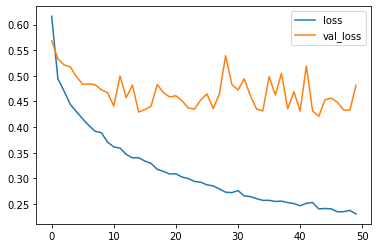

In [ ]:
# Plotting loss
plt.plot(hist['loss'],label='loss')
plt.plot(hist['val_loss'],label='val_loss')
plt.legend()

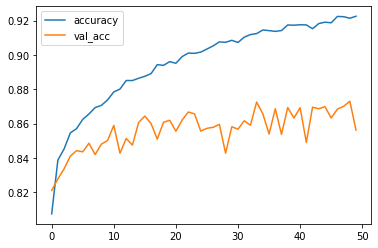

In [ ]:
# Plotting the accuracy
plt.plot(hist['accuracy'],label='accuracy')
plt.plot(hist['val_accuracy'],label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[912   7  16  12   4   1   9   4  27   8]
 [ 11 944   0   0   0   0   1   1  10  33]
 [ 53   1 749  46  35  21  73  11   2   9]
 [ 17   8  23 750  29  58  80  17   4  14]
 [ 16   1  22  38 818  16  61  26   1   1]
 [  8   3  15 141  31 718  45  31   0   8]
 [  5   1  15  22   4   2 943   2   3   3]
 [ 13   2  15  30  26  10   6 891   5   2]
 [ 46  10   3   5   0   1   6   0 913  16]
 [ 12  44   0   3   1   1   3   3   9 924]]


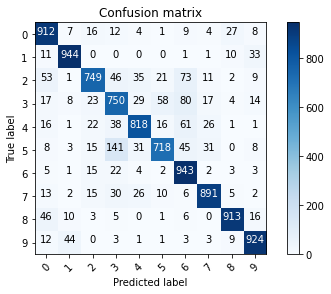

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



In [ ]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

True label: dog Predicted: frog


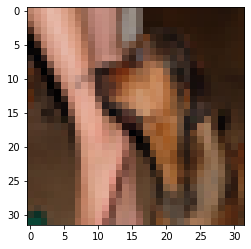

In [ ]:
# Checking misclassified images
misclassified_img = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_img)
plt.imshow(x_test[i],cmap='gray')
print("True label: %s Predicted: %s"%(labels[y_test[i]],labels[p_test[i]]))

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from resnets_utils import *
plot_model(happyModel, to_file='HappyModel.png')
SVG(model_to_dot(happyModel).create(prog='dot', format='svg'))